In [2]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd 
import yfinance as yf
%matplotlib inline

In [3]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Energy – XLE
# Basic Materials – XLB
# Industrials – XLI
# Consumer Discretionary – XLY
# Consumer Staples – XLP
# Healthcare – XLV
# Financial – XLF
# Information Technology – XLK
# Communications – XTL
# Utilities – XLU
# Real Estate – XLRE

xle= yf.Ticker("XLE")
xlb= yf.Ticker("XLB")
xli= yf.Ticker("XLI")
xly= yf.Ticker("XLY")
xlp= yf.Ticker("XLP")
xlv= yf.Ticker("XLV")
xlf= yf.Ticker("XLF")
xlk= yf.Ticker("XLK")
xtl= yf.Ticker("XTL")
xlu= yf.Ticker("XLU")
xlre= yf.Ticker("XLRE")
spy= yf.Ticker("SPY")

In [5]:
xle_data= xle.history(period="12mo")
xlb_data= xlb.history(period="12mo")
xli_data= xli.history(period="12mo")
xly_data= xly.history(period="12mo")
xlp_data= xlp.history(period="12mo")
xlv_data= xlv.history(period="12mo")
xlf_data= xlf.history(period="12mo")
xlk_data= xlk.history(period="12mo")
xtl_data= xtl.history(period="12mo")
xlu_data= xlu.history(period="12mo")
xlre_data= xlre.history(period="12mo")
spy_data=spy.history(period="12mo")

In [6]:
xle_df = pd.DataFrame(xle_data, columns = ['Open', 'High','Low','Close','Volume', 'Sector'])
xlb_df= pd.DataFrame(xlb_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xli_df= pd.DataFrame(xli_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xly_df= pd.DataFrame(xly_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xlp_df= pd.DataFrame(xlp_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xlv_df= pd.DataFrame(xlv_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xlf_df= pd.DataFrame(xlf_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xlk_df= pd.DataFrame(xlk_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xtl_df= pd.DataFrame(xtl_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xlu_df= pd.DataFrame(xlu_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
xlre_df=pd.DataFrame(xlre_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])
spy_df=pd.DataFrame(spy_data, columns=['Open', 'High','Low','Close','Volume', 'Sector'])


xle_df['Sector']='XLE'
xlb_df['Sector']='XLB'
xli_df['Sector']='XLI'
xly_df['Sector']='XLY'
xlp_df['Sector']='XLP'
xlv_df['Sector']='XLV'
xlf_df['Sector']='XLF'
xlk_df['Sector']='XLK'
xtl_df['Sector']='XTL'
xlu_df['Sector']='XLU'
xlre_df['Sector']='XLRE'
spy_df['Sector']='SPY'

spy_df

,Open,High,Low,Close,Volume,Sector
Date,,,,,,
2019-04-25,286.27,286.92,284.91,286.20,57770900,SPY
2019-04-26,286.25,287.61,285.41,287.53,50916400,SPY
2019-04-29,287.63,288.55,287.53,287.99,57197700,SPY
2019-04-30,287.61,288.45,286.07,288.13,81111700,SPY
2019-05-01,288.82,289.04,285.96,285.97,71671900,SPY
...,...,...,...,...,...,...
2020-04-20,282.61,286.79,281.35,281.59,100109300,SPY
2020-04-21,276.73,278.04,272.02,273.04,126385700,SPY
2020-04-22,278.35,281.00,276.91,279.10,93524600,SPY


In [7]:
frames = [xle_df, xlb_df, xli_df, xly_df, xlp_df, xlv_df, xlf_df, xlk_df, xtl_df, xlu_df, xlre_df,spy_df]
data = pd.concat(frames)

data

,Open,High,Low,Close,Volume,Sector
Date,,,,,,
2019-04-25,62.15,62.47,61.82,61.96,12060900,XLE
2019-04-26,61.51,61.53,60.62,61.16,16838400,XLE
2019-04-29,61.18,61.44,60.98,61.10,12974500,XLE
2019-04-30,61.70,61.74,60.98,61.06,14327000,XLE
2019-05-01,61.08,61.26,59.79,59.84,22155700,XLE
...,...,...,...,...,...,...
2020-04-20,282.61,286.79,281.35,281.59,100109300,SPY
2020-04-21,276.73,278.04,272.02,273.04,126385700,SPY
2020-04-22,278.35,281.00,276.91,279.10,93524600,SPY


In [8]:
sector_data = yf.Tickers('XLE XLB XLI XLY XLP XLV XLF XLK XTL XLU XLRE')
ETFinput = sector_data.history(period = '12mo')
ETFinput
ETFinput['Close']

[*********************100%***********************]  11 of 11 completed


,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XTL
Date,,,,,,,,,,,
2019-04-25,55.305599,61.963009,26.807379,75.241867,77.677933,54.945915,34.594231,56.104668,86.051712,117.951103,72.257500
2019-04-26,55.764851,61.159496,27.051527,75.809052,77.382431,55.442146,34.826473,56.191711,86.910980,118.887070,72.297089
2019-04-29,55.657364,61.104088,27.324970,75.985077,77.402138,55.510262,34.468437,55.862877,86.754753,118.473282,72.594124
2019-04-30,56.136162,61.057903,27.364035,76.288239,77.530174,56.152443,34.865177,56.781677,87.155075,118.295937,72.475304
2019-05-01,55.119942,59.838779,27.139421,75.789497,77.333191,55.461609,34.865177,56.201385,86.998856,116.857498,71.792145
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,49.020000,32.889999,22.000000,61.419998,87.830002,59.310001,33.259998,58.240002,99.980003,110.959999,65.110001
2020-04-21,47.810001,32.310001,21.290001,59.970001,84.150002,58.049999,32.770000,57.279999,96.940002,108.080002,63.139999
2020-04-22,48.750000,33.459999,21.520000,60.599998,87.389999,58.610001,33.340000,58.950001,98.419998,110.410004,64.730003


In [9]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Volume
count,3036.000000,3036.000000,3036.000000,3036.000000,3.036000e+03
mean,85.165787,85.805208,84.513982,85.191209,2.148780e+07
std,67.769750,68.167605,67.379991,67.796549,3.483155e+07
min,18.440000,18.600000,17.490000,17.660000,2.000000e+02
25%,55.457500,56.000000,54.947500,55.455000,5.204975e+06
50%,63.590000,64.005000,63.270000,63.685000,1.083065e+07
75%,87.785000,88.832500,87.185000,88.075000,2.097155e+07
max,335.820000,337.100000,335.510000,336.360000,3.922207e+08


In [10]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close', 'Sector'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()
df

,Date,Close,Sector
0,2019-04-25,61.96,XLE
1,2019-04-26,61.16,XLE
2,2019-04-29,61.10,XLE
3,2019-04-30,61.06,XLE
4,2019-05-01,59.84,XLE
...,...,...,...
3031,2020-04-20,281.59,SPY
3032,2020-04-21,273.04,SPY
3033,2020-04-22,279.10,SPY
3034,2020-04-23,279.08,SPY


In [11]:
# Check for missing values in the columns
df.isna().values.any()

False

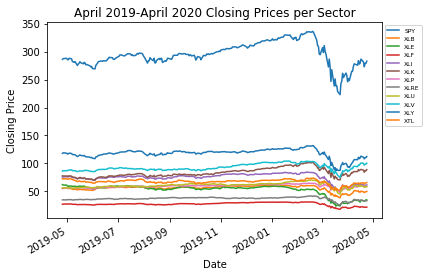

In [12]:
plot1 = df.pivot(index='Date', columns='Sector', values='Close')
# plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') 
# plt.savefig('Stock_sectors_1yr.png')
plot1.plot()

plt.figure(1, figsize=(16,10))
plt.title('April 2019-April 2020 Closing Prices per Sector')
plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.savefig('1yrSectorData.png', dpi=250)
plt.show()

Linear Regression Model

In [13]:
# Tickers('XLE XLB XLI XLY XLP XLV XLF XLK XTL XLU XLRE')
sector_data = yf.Ticker('XLRE')
ETFinput = sector_data.history(period = '12mo')
ETFinput
X = ETFinput['Close']
X

Date
2019-04-25    34.59
2019-04-26    34.83
2019-04-29    34.47
2019-04-30    34.87
2019-05-01    34.87
              ...  
2020-04-20    33.26
2020-04-21    32.77
2020-04-22    33.34
2020-04-23    32.96
2020-04-24    33.08
Name: Close, Length: 253, dtype: float64

In [14]:
spy = yf.Ticker('SPY')
spy_data = spy.history(period = '12mo')
y = spy_data['Close']
y

Date
2019-04-25    286.20
2019-04-26    287.53
2019-04-29    287.99
2019-04-30    288.13
2019-05-01    285.97
               ...  
2020-04-20    281.59
2020-04-21    273.04
2020-04-22    279.10
2020-04-23    279.08
2020-04-24    282.97
Name: Close, Length: 253, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
X_train = X_train.values.reshape(-1, 1)

In [17]:
X_train.shape

(202, 1)

In [18]:
y_train.shape

(202,)

In [19]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# The coefficient
print('Slope: ', model.coef_)
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  [6.44553062]
Intercept:  56.687831657093795


In [21]:
len(X) == len(y)

True

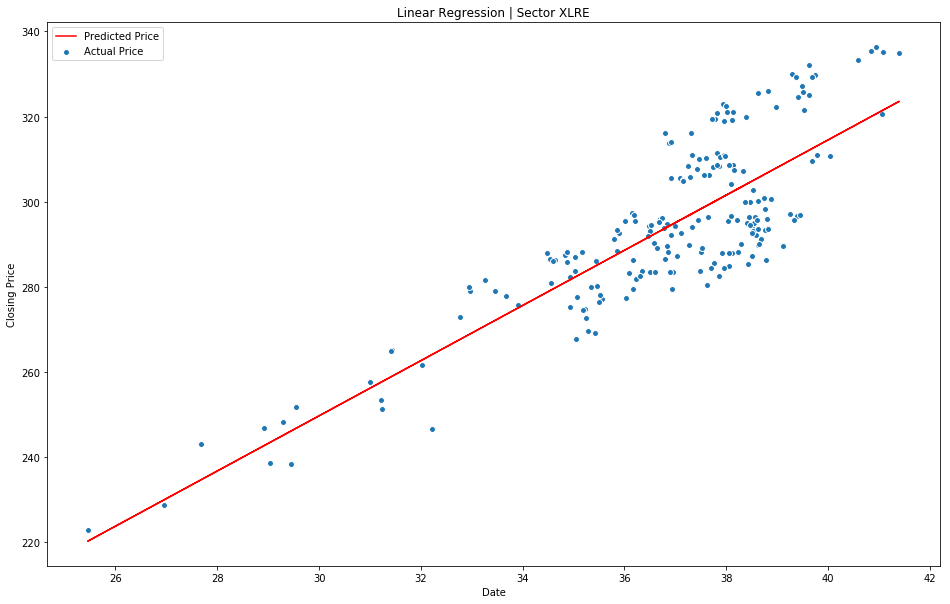

In [15]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Sector XLRE')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig('LinearRegression.png', dpi=250)
plt.show()

In [16]:
X_test = X_test.values.reshape(-1, 1)

In [17]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [18]:
y_pred

array([312.50832826, 281.67076853, 297.93175066, 324.68786866,
       305.12286227, 309.65779753, 315.16450462, 299.35701602,
       278.43152906, 289.25058888, 301.49491407, 285.42828631,
       240.53242729, 303.50324254, 297.86696587, 291.77719567,
       310.95349332, 284.06780573, 301.3005597 , 280.76378148,
       257.05254857, 283.22560347, 305.31721664, 302.20754675,
       289.63929762, 309.26908879, 271.36998702, 274.28530254,
       278.43152906, 296.31213092, 307.3903299 , 300.7174966 ,
       299.29223123, 325.01179261, 296.63605487, 282.12426205,
       301.43012928, 281.34684458, 298.45002897, 298.77395292,
       307.64946906, 302.92017944, 244.03080591, 303.82716649,
       286.98312125, 290.3519303 , 285.36350152, 292.68418272,
       324.4287295 , 312.18440431, 302.98496423])

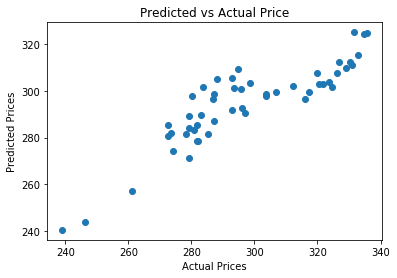

In [19]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

In [22]:
# Tickers('XLE XLB XLI XLY XLP XLV XLF XLK XTL XLU XLRE')
stocks=['XLE','XLB', 'XLI', 'XLY', 'XLP', 'XLV' ,'XLF', 'XLK', 'XTL','XLU', 'XLRE', 'SPY']

stock_data = yf.Tickers(stocks)
stockinput = stock_data.history(period = '25mo')
pull_stocks=stockinput['Close']
pull_stocks
# X.set_index('Date', inplace=True)




[*********************100%***********************]  12 of 12 completed


,SPY,XLB,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XTL
Date,,,,,,,,,,,,
2018-03-26,254.857224,54.746078,60.877377,26.504789,71.361069,64.775314,48.746975,28.440884,46.353073,78.154930,100.311066,68.198624
2018-03-27,250.521652,54.190670,60.304150,25.987902,70.374474,62.697681,48.718636,28.487537,47.016994,77.232292,98.346481,67.241920
2018-03-28,249.781372,53.501202,59.130852,26.035763,70.135010,62.280212,49.389500,29.010073,46.998295,77.645554,97.150192,66.343811
2018-03-29,252.973022,54.525837,60.375813,26.389925,71.159920,63.513203,49.729668,29.000744,47.250774,78.231819,98.511810,67.241920
2018-04-02,247.512665,53.338413,59.166676,25.806032,69.694397,61.998661,48.510754,28.646166,46.886086,76.453827,95.730247,65.933807
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,281.589996,49.020000,32.889999,22.000000,61.419998,87.830002,59.310001,33.259998,58.240002,99.980003,110.959999,65.110001
2020-04-21,273.040009,47.810001,32.310001,21.290001,59.970001,84.150002,58.049999,32.770000,57.279999,96.940002,108.080002,63.139999
2020-04-22,279.100006,48.750000,33.459999,21.520000,60.599998,87.389999,58.610001,33.340000,58.950001,98.419998,110.410004,64.730003


In [23]:
stock_df=pd.DataFrame(pull_stocks,columns=stocks)

stock_df

,XLE,XLB,XLI,XLY,XLP,XLV,XLF,XLK,XTL,XLU,XLRE,SPY
Date,,,,,,,,,,,,
2018-03-26,60.877377,54.746078,71.361069,100.311066,48.746975,78.154930,26.504789,64.775314,68.198624,46.353073,28.440884,254.857224
2018-03-27,60.304150,54.190670,70.374474,98.346481,48.718636,77.232292,25.987902,62.697681,67.241920,47.016994,28.487537,250.521652
2018-03-28,59.130852,53.501202,70.135010,97.150192,49.389500,77.645554,26.035763,62.280212,66.343811,46.998295,29.010073,249.781372
2018-03-29,60.375813,54.525837,71.159920,98.511810,49.729668,78.231819,26.389925,63.513203,67.241920,47.250774,29.000744,252.973022
2018-04-02,59.166676,53.338413,69.694397,95.730247,48.510754,76.453827,25.806032,61.998661,65.933807,46.886086,28.646166,247.512665
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,32.889999,49.020000,61.419998,110.959999,59.310001,99.980003,22.000000,87.830002,65.110001,58.240002,33.259998,281.589996
2020-04-21,32.310001,47.810001,59.970001,108.080002,58.049999,96.940002,21.290001,84.150002,63.139999,57.279999,32.770000,273.040009
2020-04-22,33.459999,48.750000,60.599998,110.410004,58.610001,98.419998,21.520000,87.389999,64.730003,58.950001,33.340000,279.100006


In [45]:
X= stock_df.iloc[:,0:11]
Y= stock_df.SPY


In [46]:
from sklearn import linear_model

# Create LinearRegression Object
linreg = linear_model.LinearRegression()


In [42]:
# y_train = y_train.values.reshape(-1, 1)

# y_train.shape

In [47]:
# Fit linear model using the train data set
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
import statsmodels.api as sm 

print('Intercept: \n', linreg.intercept_)
print('Coefficients: \n', linreg.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 5.144606269974361
Coefficients: 
 [ 0.26023217 -0.04161507  0.43523223  0.39604849  0.36205295  0.49552945
  1.33653299  0.95477804 -0.02622085  0.11910365  0.28642872]
                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.059e+05
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:56:57   Log-Likelihood:                -158.60
No. Observations:                 525   AIC:                             341.2
Df Residuals:                     513   BIC:                             392.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std